In [1]:
import pandas as pd
data = pd.read_excel("time_series_375_preprocess_en.xlsx")  #training data
data.shape

(6120, 81)

In [2]:
data.head(30)

,PATIENT_ID,RE_DATE,age,gender,Admission time,Discharge time,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,Hypersensitive c-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
0,1.0,2020-01-31 01:09:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2020-01-31 01:25:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,136.0,NaN,...,31.9,NaN,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN
2,NaN,2020-01-31 01:44:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,103.1,...,NaN,NaN,43.1,NaN,137.7,NaN,NaN,16.0,46.6,130.0
3,NaN,2020-01-31 01:45:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2020-01-31 01:56:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,19.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,2020-01-31 01:59:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41.0,NaN,NaN,NaN
6,NaN,2020-01-31 02:09:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.09,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,2020-01-31 06:44:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,2020-02-04 19:42:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,2020-02-06 09:14:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,140.0,NaN,...,32.1,NaN,NaN,NaN,NaN,0.23,NaN,NaN,NaN,NaN


In [2]:
# In the data, one patient has different set of values - rows. but we can see that 
# only the first row has the patient ID and the rest of the cases have NaN as the value.
# All the rows should have the same patient id. we are recognising this with the help of admission
# date as the admission date will not change for different cases. to fill Nan values we use the preceding values.
data['PATIENT_ID'] = data['PATIENT_ID'].fillna(method = 'ffill')

In [3]:
data['PATIENT_ID']

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
        ...  
6115    375.0
6116    375.0
6117    375.0
6118    375.0
6119    375.0
Name: PATIENT_ID, Length: 6120, dtype: float64

In [4]:
# As there are different set of values for each patient we are choosing the value which is most recent. 
# to do this we group the patient id and with respect to the admission time - 

data_1 = data.sort_values('RE_DATE').groupby('PATIENT_ID').tail(1)

In [5]:
data_1 = data_1.sort_values('PATIENT_ID')
data_1.head()

,PATIENT_ID,RE_DATE,age,gender,Admission time,Discharge time,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,Hypersensitive c-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
23,1.0,2020-02-17 08:31:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,2.0,2020-02-17 15:34:00,61,1,2020-02-04 21:39:03,2020-02-19 12:59:01,0,NaN,NaN,NaN,...,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,3.0,2020-02-06 23:15:00,70,2,2020-01-23 10:59:36,2020-02-08 17:52:31,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,4.0,2020-02-17 08:31:00,74,1,2020-01-31 23:03:59,2020-02-18 12:59:12,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,5.0,2020-02-18 09:35:00,29,2,2020-02-01 20:59:54,2020-02-18 10:33:06,0,NaN,130.0,NaN,...,30.0,NaN,NaN,NaN,NaN,0.36,NaN,NaN,NaN,NaN


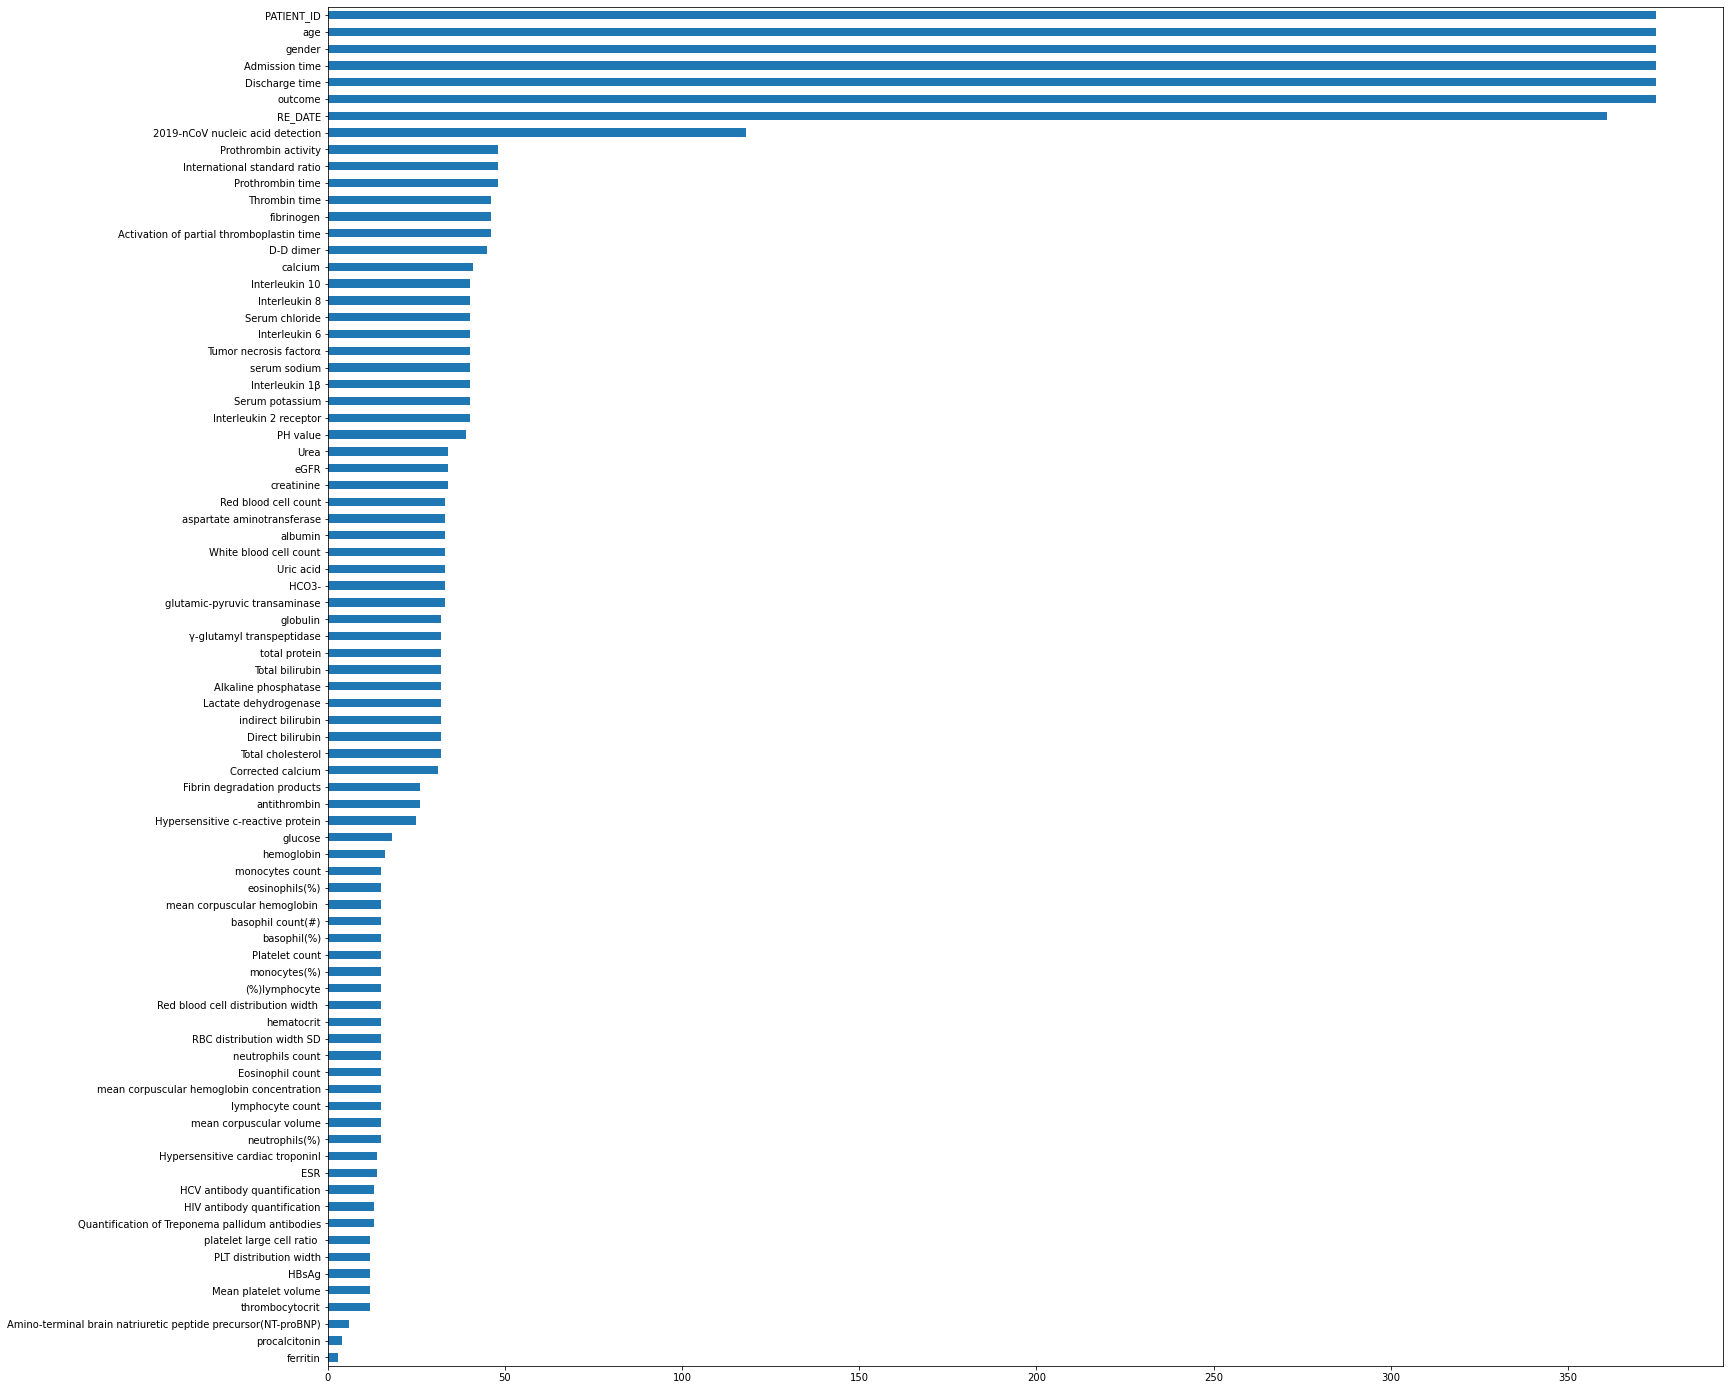

In [6]:
import numpy as np
data3 = data_1.notnull().sum()
#data.notnull().sum().plot(kind="barh",figsize = (25,25))
data3.sort_values().plot(kind="barh",figsize = (25,25))


In [8]:
## remove rows if all the feature columns are NaN
pd.options.display.max_columns = None
data_2 = data_1.dropna(subset = ['Hypersensitive cardiac troponinI',
       'hemoglobin', 'Serum chloride', 'Prothrombin time', 'procalcitonin',
       'eosinophils(%)',  'Alkaline phosphatase',
       'albumin', 'basophil(%)',  'Total bilirubin',
       'Platelet count', 'monocytes(%)', 'antithrombin', 
       'indirect bilirubin', 'Red blood cell distribution width ',
       'neutrophils(%)', 'total protein',
       
       'Prothrombin activity',  'mean corpuscular volume',
       'hematocrit', 'White blood cell count', 
       'mean corpuscular hemoglobin concentration', 'fibrinogen',
        'Urea', 'lymphocyte count', 'PH value',
       'Red blood cell count', 'Eosinophil count', 'Corrected calcium',
       'Serum potassium', 'glucose', 'neutrophils count', 'Direct bilirubin',
       'Mean platelet volume',  'RBC distribution width SD',
       'Thrombin time', '(%)lymphocyte', 
       'D-D dimer', 'Total cholesterol', 'aspartate aminotransferase',
       'Uric acid', 'HCO3-', 'calcium',
       'Amino-terminal brain natriuretic peptide precursor(NT-proBNP)',
       'Lactate dehydrogenase', 'platelet large cell ratio ', 
       'Fibrin degradation products', 'monocytes count',
       'PLT distribution width', 'globulin', 'γ-glutamyl transpeptidase',
       'International standard ratio', 'basophil count(#)',
       '2019-nCoV nucleic acid detection', 'mean corpuscular hemoglobin ',
       'Activation of partial thromboplastin time',
       'Hypersensitive c-reactive protein', 
       'serum sodium', 'thrombocytocrit', 'ESR',
       'glutamic-pyruvic transaminase', 'eGFR', 'creatinine'],how ="all")

In [8]:
data_2.shape

(307, 81)

outcome
0    169
1    138
dtype: int64


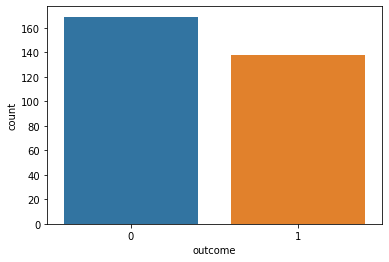

In [9]:
import seaborn as sns

print(data_2.groupby('outcome').size())

sns.countplot(x="outcome", data=data_2)

In [7]:
import matplotlib.pyplot as plt
import missingno as msno
msno.bar(data_2)

NameError: name 'data_2' is not defined

In [9]:
test_data = pd.read_excel("time_series_test_110_preprocess_en.xlsx")  #test data
test_data.shape
test_data['PATIENT_ID'] = test_data['PATIENT_ID'].fillna(method = 'ffill')
test_data.head(25)

,PATIENT_ID,RE_DATE,Lactate dehydrogenase,Hypersensitive c-reactive protein,(%)lymphocyte,Admission time,Discharge time,outcome
0,1.0,2020-02-10 11:15:00,NaN,NaN,28.0,2020-02-09 10:47:24,2020-02-21 14:51:12,0
1,1.0,2020-02-10 12:07:00,183.0,5.1,NaN,2020-02-09 10:47:24,2020-02-21 14:51:12,0
2,1.0,2020-02-13 09:35:00,NaN,NaN,28.6,2020-02-09 10:47:24,2020-02-21 14:51:12,0
3,1.0,2020-02-13 10:06:00,194.0,2.7,NaN,2020-02-09 10:47:24,2020-02-21 14:51:12,0
4,2.0,2020-02-09 06:56:00,NaN,NaN,28.3,2020-02-09 03:39:47,2020-02-21 11:57:40,0
5,2.0,2020-02-09 07:24:00,216.0,5.3,NaN,2020-02-09 03:39:47,2020-02-21 11:57:40,0
6,2.0,2020-02-16 10:02:00,NaN,NaN,30.5,2020-02-09 03:39:47,2020-02-21 11:57:40,0
7,2.0,2020-02-16 11:39:00,172.0,0.7,NaN,2020-02-09 03:39:47,2020-02-21 11:57:40,0
8,3.0,2020-01-28 04:55:00,NaN,NaN,12.0,2020-01-27 23:06:56,2020-02-14 17:53:08,1
9,3.0,2020-01-28 05:25:00,366.0,34.7,NaN,2020-01-27 23:06:56,2020-02-14 17:53:08,1


In [10]:
test_data_1 = test_data.sort_values('RE_DATE').groupby('PATIENT_ID').tail(1)
test_data_1 = test_data_1.sort_values('PATIENT_ID')
test_data_1.head()
test_data_1.shape

(110, 8)

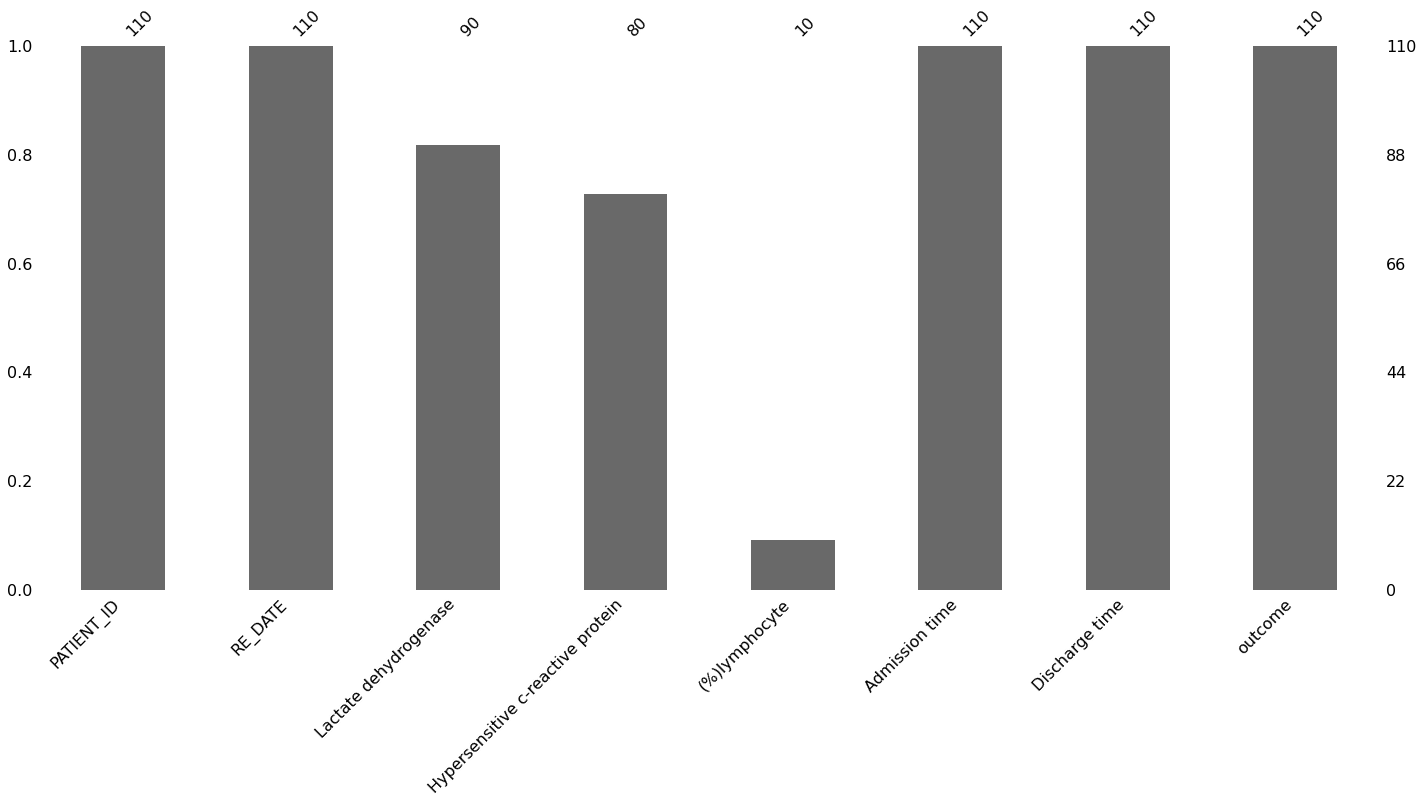

In [11]:
import matplotlib.pyplot as plt
import missingno as msno
msno.bar(test_data_1)

In [13]:
al = {'Hypersensitive cardiac troponinI':data_1['Hypersensitive cardiac troponinI'].median(),
       'hemoglobin':data_1['hemoglobin'].median(), 'Serum chloride':data_1['Serum chloride'].median(), 'Prothrombin time':data_1['Prothrombin time'].median(), 'procalcitonin':data_1['procalcitonin'].median(),
       'eosinophils(%)':data_1['eosinophils(%)'].median(), 'Interleukin 2 receptor':data_1['Interleukin 2 receptor'].median(), 'Alkaline phosphatase':data_1['Alkaline phosphatase'].median(),
       'albumin':data_1['albumin'].median(), 'basophil(%)':data_1['basophil(%)'].median(), 'Interleukin 10':data_1['Interleukin 10'].median(), 'Total bilirubin':data_1['Total bilirubin'].median(),
       'Platelet count':data_1['Platelet count'].median(), 'monocytes(%)':data_1['monocytes(%)'].median(), 'antithrombin':data_1['antithrombin'].median(), 'Interleukin 8':data_1['Interleukin 8'].median(),
       'indirect bilirubin':data_1['indirect bilirubin'].median(), 'Red blood cell distribution width ':data_1['Red blood cell distribution width '].median(),
       'neutrophils(%)':data_1['neutrophils(%)'].median(), 'total protein':data_1['total protein'].median(),
       'Quantification of Treponema pallidum antibodies':data_1['Quantification of Treponema pallidum antibodies'].median(),
       'Prothrombin activity':data_1['Prothrombin activity'].median(), 'HBsAg':data_1['HBsAg'].median(), 'mean corpuscular volume':data_1['mean corpuscular volume'].median(),
       'hematocrit':data_1['hematocrit'].median(), 'White blood cell count':data_1['White blood cell count'].median(), 'Tumor necrosis factorα':data_1['Tumor necrosis factorα'].median(),
       'mean corpuscular hemoglobin concentration':data_1['mean corpuscular hemoglobin concentration'].median(), 'fibrinogen':data_1['fibrinogen'].median(),
       'Interleukin 1β':data_1['Interleukin 1β'].median(), 'Urea':data_1['Urea'].median(), 'lymphocyte count':data_1['lymphocyte count'].median(), 'PH value':data_1['PH value'].median(),
       'Red blood cell count':data_1['Red blood cell count'].median(), 'Eosinophil count':data_1['Eosinophil count'].median(), 'Corrected calcium':data_1['Corrected calcium'].median(),
       'Serum potassium':data_1['Serum potassium'].median(), 'glucose':data_1['glucose'].median(), 'neutrophils count':data_1['neutrophils count'].median(), 'Direct bilirubin':data_1['Direct bilirubin'].median(),
       'Mean platelet volume':data_1['Mean platelet volume'].median(), 'ferritin':data_1['ferritin'].median(), 'RBC distribution width SD':data_1['RBC distribution width SD'].median(),
       'Thrombin time':data_1['Thrombin time'].median(), '(%)lymphocyte':data_1['(%)lymphocyte'].median(), 'HCV antibody quantification':data_1['HCV antibody quantification'].median(),
       'D-D dimer':data_1['D-D dimer'].median(), 'Total cholesterol':data_1['Total cholesterol'].median(), 'aspartate aminotransferase':data_1['aspartate aminotransferase'].median(),
       'Uric acid':data_1['Uric acid'].median(), 'HCO3-':data_1['HCO3-'].median(), 'calcium':data_1['calcium'].median(),
       'Amino-terminal brain natriuretic peptide precursor(NT-proBNP)':data_1['Amino-terminal brain natriuretic peptide precursor(NT-proBNP)'].median(),
       'Lactate dehydrogenase':data_1['Lactate dehydrogenase'].median(), 'platelet large cell ratio ':data_1['platelet large cell ratio '].median(), 'Interleukin 6':data_1['Interleukin 6'].median(),
       'Fibrin degradation products':data_1['Fibrin degradation products'].median(), 'monocytes count':data_1['monocytes count'].median(),
       'PLT distribution width':data_1['PLT distribution width'].median(), 'globulin':data_1['globulin'].median(), 'γ-glutamyl transpeptidase':data_1['γ-glutamyl transpeptidase'].median(),
       'International standard ratio':data_1['International standard ratio'].median(), 'basophil count(#)':data_1['basophil count(#)'].median(),
       '2019-nCoV nucleic acid detection':data_1['2019-nCoV nucleic acid detection'].median(), 'mean corpuscular hemoglobin ':data_1['mean corpuscular hemoglobin '].median(),
       'Activation of partial thromboplastin time':data_1['Activation of partial thromboplastin time'].median(),
       'Hypersensitive c-reactive protein':data_1['Hypersensitive c-reactive protein'].median(), 'HIV antibody quantification':data_1['HIV antibody quantification'].median(),
       'serum sodium':data_1['serum sodium'].median(), 'thrombocytocrit':data_1['thrombocytocrit'].median(), 'ESR':data_1['ESR'].median(),
       'glutamic-pyruvic transaminase':data_1['glutamic-pyruvic transaminase'].median(), 'eGFR':data_1['eGFR'].median(), 'creatinine':data_1['creatinine'].median()}
train_data = data_1.fillna(value = al)

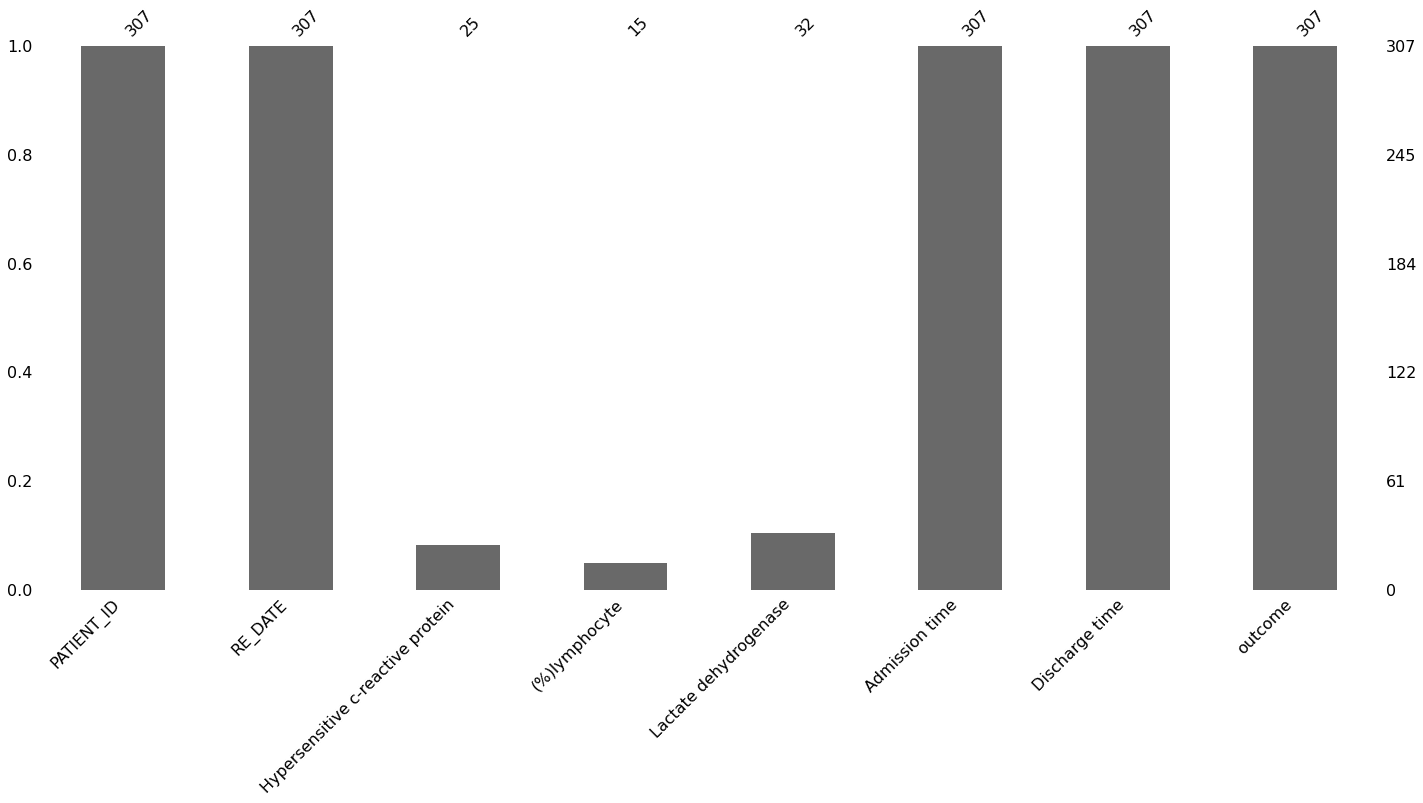

In [14]:
train_data = data_2[['PATIENT_ID','RE_DATE','Hypersensitive c-reactive protein','(%)lymphocyte','Lactate dehydrogenase','Admission time','Discharge time','outcome']]
train_data.head()
msno.bar(train_data)

In [14]:
values = {'Hypersensitive c-reactive protein':test_data_1['Hypersensitive c-reactive protein'].median(),'(%)lymphocyte':test_data_1['(%)lymphocyte'].median(),'Lactate dehydrogenase':test_data_1['Lactate dehydrogenase'].median()}
test_data_1 = test_data_1.fillna(value = values)
test_data_1

,PATIENT_ID,RE_DATE,Lactate dehydrogenase,Hypersensitive c-reactive protein,(%)lymphocyte,Admission time,Discharge time,outcome
3,1.0,2020-02-13 10:06:00,194.0,2.7,29.65,2020-02-09 10:47:24,2020-02-21 14:51:12,0
7,2.0,2020-02-16 11:39:00,172.0,0.7,29.65,2020-02-09 03:39:47,2020-02-21 11:57:40,0
25,3.0,2020-02-13 11:04:00,1131.0,9.1,29.65,2020-01-27 23:06:56,2020-02-14 17:53:08,1
33,4.0,2020-03-04 08:02:36,161.0,2.1,29.65,2020-02-01 19:49:13,2020-02-22 14:22:38,0
39,5.0,2020-02-04 11:04:00,241.0,4.6,29.65,2020-01-22 19:42:32,2020-02-04 15:09:30,0
...,...,...,...,...,...,...,...,...
716,106.0,2020-02-24 10:21:09,740.0,263.6,29.65,2020-02-05 04:30:21,2020-02-24 11:14:40,1
720,107.0,2020-02-14 10:02:00,152.0,0.4,29.65,2020-02-05 01:34:51,2020-02-22 12:34:44,0
728,108.0,2020-02-19 07:16:34,148.0,1.1,29.65,2020-02-05 01:23:47,2020-02-22 12:20:40,0
750,109.0,2020-02-17 07:39:00,430.0,2.0,29.65,2020-02-05 00:29:05,2020-02-18 12:05:02,1


In [15]:
test_data_1["Days_in_hopsital"] = (test_data_1['Discharge time']- test_data_1['Admission time']).dt.total_seconds()/(86400.0)
test_data_1.dtypes

PATIENT_ID                                  float64
RE_DATE                              datetime64[ns]
Lactate dehydrogenase                       float64
Hypersensitive c-reactive protein           float64
(%)lymphocyte                               float64
Admission time                       datetime64[ns]
Discharge time                       datetime64[ns]
outcome                                       int64
Days_in_hopsital                            float64
dtype: object

In [16]:
train_data["Days_in_hopsital"] = (train_data['Discharge time']- train_data['Admission time']).dt.total_seconds()/(86400.0)
train_data.dtypes

PATIENT_ID                              float64
RE_DATE                          datetime64[ns]
age                                       int64
gender                                    int64
Admission time                   datetime64[ns]
                                      ...      
ESR                                     float64
glutamic-pyruvic transaminase           float64
eGFR                                    float64
creatinine                              float64
Days_in_hopsital                        float64
Length: 82, dtype: object

## models for given test data and train data


In [19]:
train_data_1 = train_data[['PATIENT_ID','RE_DATE','Admission time','Discharge time','outcome','Hypersensitive c-reactive protein','(%)lymphocyte','Lactate dehydrogenase',"Days_in_hopsital"]]

In [69]:
train_data_1.head()

,PATIENT_ID,RE_DATE,Admission time,Discharge time,outcome,Hypersensitive c-reactive protein,(%)lymphocyte,Lactate dehydrogenase,Days_in_hopsital
23,1.0,2020-02-17 08:31:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,57.3,6.1,718.0,17.602338
52,2.0,2020-02-17 15:34:00,2020-02-04 21:39:03,2020-02-19 12:59:01,0,57.3,6.1,718.0,14.638866
70,3.0,2020-02-06 23:15:00,2020-01-23 10:59:36,2020-02-08 17:52:31,0,57.3,6.1,718.0,16.286748
84,4.0,2020-02-17 08:31:00,2020-01-31 23:03:59,2020-02-18 12:59:12,0,57.3,6.1,718.0,17.580012
105,5.0,2020-02-18 09:35:00,2020-02-01 20:59:54,2020-02-18 10:33:06,0,57.3,23.6,718.0,16.564722


In [18]:
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

features_column =  ['Lactate dehydrogenase', '(%)lymphocyte','Hypersensitive c-reactive protein',"Days_in_hopsital"]
target_column = ['outcome']
Xtrain_data = train_data_1[features_column]
Ytrain_data = train_data_1[target_column]
Xtest_data = test_data_1[features_column]
Ytest_data = test_data_1[target_column]
model_DT = DecisionTreeClassifier(criterion='entropy',splitter='best',random_state=0)
model_DT= model_DT.fit(Xtrain_data,Ytrain_data)
target_pred = model_DT.predict(Xtest_data)

#print(target_pred)
metrics.accuracy_score(Ytest_data, target_pred)

0.7454545454545455

In [20]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators = 100,criterion='entropy',random_state=0)
model_RF = model_RF.fit(Xtrain_data,Ytrain_data)
target_pred_RF = model_RF.predict(Xtest_data)
metrics.accuracy_score(Ytest_data, target_pred_RF)

<ipython-input-20-a3aabea8dbb9>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RF = model_RF.fit(Xtrain_data,Ytrain_data)


0.9272727272727272

In [21]:
from sklearn.svm import SVC

model_SVM = SVC()
model_SVM  = model_SVM.fit(Xtrain_data,Ytrain_data)
target_pred_SVM = model_SVM.predict(Xtest_data)
metrics.accuracy_score(Ytest_data, target_pred_SVM)

C:\Users\31644\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9

## Models for train test split data


In [22]:
# training data for 7 selected biomarkers
train_data_new = train_data[['PATIENT_ID','RE_DATE','Admission time','Discharge time',"Days_in_hopsital",'outcome','2019-nCoV nucleic acid detection','Platelet count','D-D dimer','Hypersensitive cardiac troponinI','lymphocyte count','creatinine','White blood cell count','neutrophils count','Urea',]]

C:\Users\31644\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\31644\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\31644\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\31644\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

DT: 0.652987 (0.120186)
SVM: 0.051351 (0.099267)


C:\Users\31644\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\31644\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\31644\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\31644\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

RF: 0.671550 (0.119443)


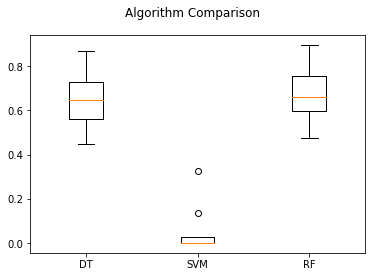

In [89]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
features = ['2019-nCoV nucleic acid detection','Platelet count','D-D dimer','Hypersensitive cardiac troponinI','lymphocyte count','creatinine','White blood cell count','neutrophils count','Urea','Days_in_hopsital']
target = ['outcome']
X = train_data_new[features]
y = train_data_new[target]
#array = dataframe.values
X = train_data_new[features]
Y = train_data_new[target]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
#models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier(n_estimators = 100,criterion='entropy',random_state=0)
))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
#plt.bar(results,height=100)
plt.subplot()
ax.set_xticklabels(names)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split # Import train_test_split function

features = ['2019-nCoV nucleic acid detection','Platelet count','D-D dimer','Hypersensitive cardiac troponinI','lymphocyte count','creatinine','White blood cell count','neutrophils count','Urea']
target = ['outcome']
X = train_data_new[features]
y = train_data_new[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6106194690265486


In [40]:
train_data_combined = train_data[['PATIENT_ID','RE_DATE','Admission time','Discharge time','outcome','2019-nCoV nucleic acid detection','Platelet count','D-D dimer','Hypersensitive cardiac troponinI','lymphocyte count','creatinine','White blood cell count','neutrophils count','Urea','Hypersensitive c-reactive protein','(%)lymphocyte','Lactate dehydrogenase']]


In [34]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators = 50,criterion='entropy',random_state=100)
print(model_RF)
model_RF = model_RF.fit(X_train,y_train)
target_pred_RF = model_RF.predict(X_test)
print(metrics.accuracy_score(y_test, target_pred_RF))
np.ravel(X_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=100)
0.6106194690265486


<ipython-input-34-df81c6482ecf>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RF = model_RF.fit(X_train,y_train)


array([ -1.  , 104.  ,  10.38, ...,  11.5 ,  10.83,  13.5 ])

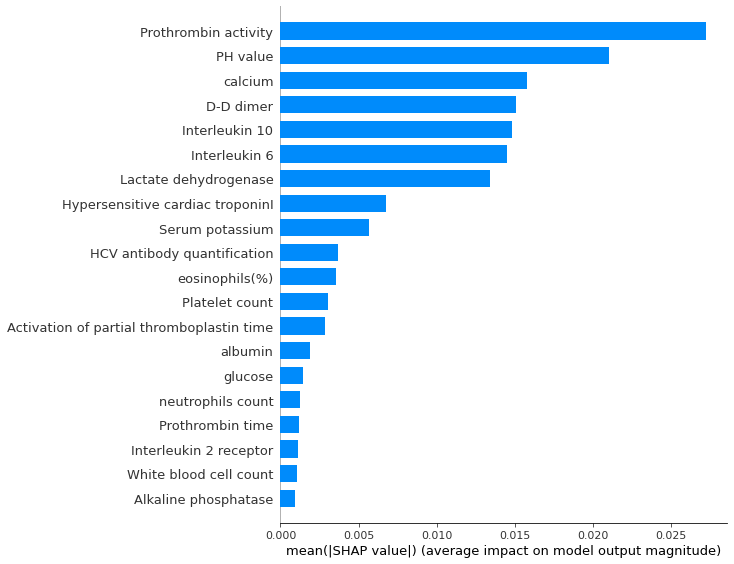

In [36]:
!pip install xgboost
!pip install shap
import xgboost
import shap
# load JS visualization code to notebook
shap.initjs()
# train XGBoost model
#X,y = shap.datasets.boston()
feature = ['Hypersensitive cardiac troponinI',
       'hemoglobin', 'Serum chloride', 'Prothrombin time', 'procalcitonin',
       'eosinophils(%)', 'Interleukin 2 receptor', 'Alkaline phosphatase',
       'albumin', 'basophil(%)', 'Interleukin 10', 'Total bilirubin',
       'Platelet count', 'monocytes(%)', 'antithrombin', 'Interleukin 8',
       'indirect bilirubin', 'Red blood cell distribution width ',
       'neutrophils(%)', 'total protein',
       'Quantification of Treponema pallidum antibodies',
       'Prothrombin activity', 'HBsAg', 'mean corpuscular volume',
       'hematocrit', 'White blood cell count', 'Tumor necrosis factorα',
       'mean corpuscular hemoglobin concentration', 'fibrinogen',
       'Interleukin 1β', 'Urea', 'lymphocyte count', 'PH value',
       'Red blood cell count', 'Eosinophil count', 'Corrected calcium',
       'Serum potassium', 'glucose', 'neutrophils count', 'Direct bilirubin',
       'Mean platelet volume', 'ferritin', 'RBC distribution width SD',
       'Thrombin time', '(%)lymphocyte', 'HCV antibody quantification',
       'D-D dimer', 'Total cholesterol', 'aspartate aminotransferase',
       'Uric acid', 'HCO3-', 'calcium',
       'Amino-terminal brain natriuretic peptide precursor(NT-proBNP)',
       'Lactate dehydrogenase', 'platelet large cell ratio ', 'Interleukin 6',
       'Fibrin degradation products', 'monocytes count',
       'PLT distribution width', 'globulin', 'γ-glutamyl transpeptidase',
       'International standard ratio', 'basophil count(#)',
       '2019-nCoV nucleic acid detection', 'mean corpuscular hemoglobin ',
       'Activation of partial thromboplastin time',
       'Hypersensitive c-reactive protein', 'HIV antibody quantification',
       'serum sodium', 'thrombocytocrit', 'ESR',
       'glutamic-pyruvic transaminase', 'eGFR', 'creatinine']
outcome = ['outcome']
Xdata = train_data[feature]
Ydata = train_data[outcome]
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(Xdata, label=Ydata), 100)
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xdata)
shap.summary_plot(shap_values, Xdata, plot_type="bar")

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


DT: 0.665434 (0.302495)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
A column-vector y was passed when

SVM: 0.101778 (0.100884)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

RF: 0.668137 (0.298333)


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


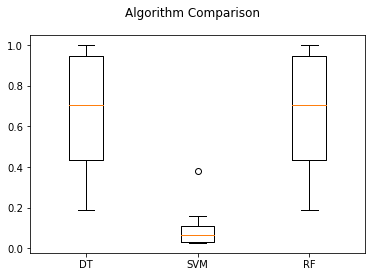

In [42]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
features = ['2019-nCoV nucleic acid detection','Platelet count','D-D dimer','Hypersensitive cardiac troponinI','lymphocyte count','creatinine','White blood cell count','neutrophils count','Urea','Hypersensitive c-reactive protein','(%)lymphocyte','Lactate dehydrogenase']

target = ['outcome']
X = train_data_combined[features]
Y = train_data_combined[target]
#array = dataframe.values
# X = train_data_combin[features]
# Y = train_data_new[target]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
#models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier(n_estimators = 100,criterion='entropy',random_state=0)
))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
#plt.bar(results,height=100)
plt.subplot()
ax.set_xticklabels(names)
plt.show()